In [22]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import ufig
import yaml
from matplotlib import colors
from NNMFit.utilities import ScanHandler, PseudoexpHandler
from ufig.figure_helpers import FigureHandler, draw_numbers
from ufig.scanplotter import ScanPlotter

# load autoreload
%load_ext autoreload
# autoreload 2
%autoreload 2

%matplotlib inline

# use the latex.mplstyle matplotlib style:
plt.style.use('latex.mplstyle')

with open("parameter_plot_config.yaml", "r", encoding="utf-8") as stream:
    parameter_plot_config = yaml.safe_load(stream)["Parameters"]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
dir(ufig)

['FigureHandler',
 'PlotFormatter',
 'ScanPlotter',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'draw_numbers',
 'figure_helpers',
 'globalfit_recospace_plotformatter',
 'lighten_color',
 'linestyles',
 'scanplotter',
 'write_preliminary']

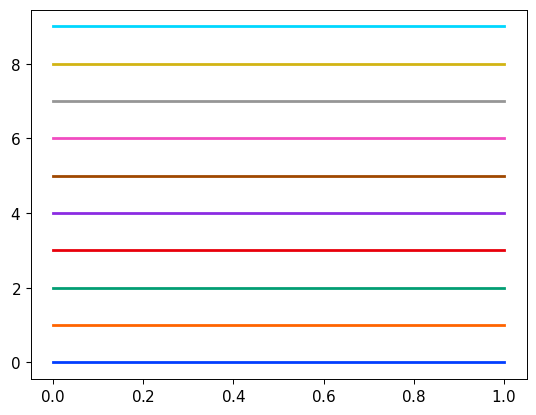

In [26]:
# testplot with all colors:
# get the colors defined in the latex.mplstyle:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, ax = plt.subplots()
for i, color in enumerate(colors):
    ax.plot([0, 1], [i, i], color=color, label=f"color {i}", lw=2)

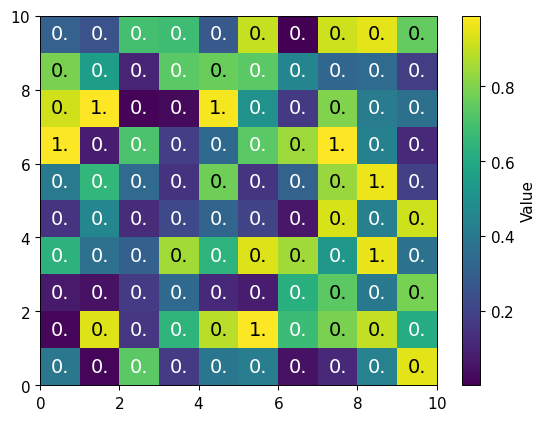

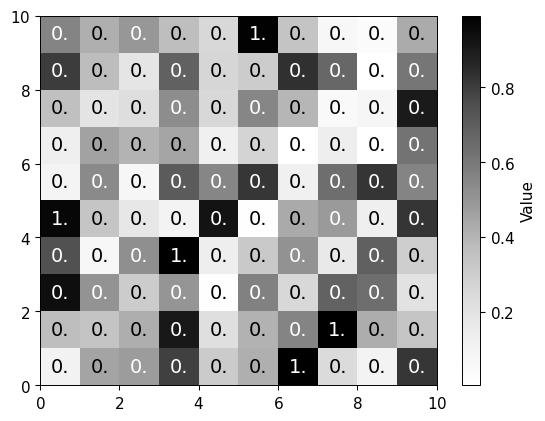

In [27]:
for cmap_name in ["viridis", "Greys"]:
    # Generate random data
    data = np.random.rand(10, 10)
    bins = np.linspace(0, 10, 11)
    bin_centers = bins[:-1] + np.diff(bins) / 2
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the pcolormesh
    cmap = ax.pcolormesh(bins, bins, data, cmap=cmap_name)

    draw_numbers(
        ax,
        data,
        bin_centers,
        bin_centers,
        cmap_name=cmap_name,
        fontsize=14,
        norm='minmax',
        round=1,
        n_characters=2,
    )
    # Add a colorbar
    plt.colorbar(cmap, label='Value')

    # Show the plot
    plt.show()


In [9]:
basepath = "/data/user/pfuerst/DiffuseExtensions/fitdata/GP_globalfit/2D3D_PoissonSay/"

scan_hdls = {}

# for name in ["2D_Poisson", "2D_SAY", "3D_Poisson", "3D_SAY"]:
for name in ["2D_Poisson"]:
    scan_hdls[name] = {}

    #asimov
    asimov_path = os.path.join(basepath, name + "_asimov")
    print(asimov_path)
    if glob.glob(os.path.join(asimov_path, 'FitRes*')):
        print("--- found asimov fits")
        scan_hdls[name]["asimov_hdl"] = ScanHandler(
            asimov_path, force_read=False
        )
        scan_hdls[name]["asimov_settings"] = {}
        scan_hdls[name]["injection_points"] = ScanPlotter.find_injection_points(
            os.path.join(asimov_path, 'Fit_Configuration.yaml')
        )

    # pseudoexp_path
    pseudoexp_path = os.path.join(basepath, name + "_pseudoexp")
    if glob.glob(os.path.join(pseudoexp_path, 'FitRes*')):
        scan_hdls[name]["pseudoexp_hdl"] = PseudoexpHandler(
            pseudoexp_path, force_read=True
        )
        scan_hdls[name]["pseudoexp_settings"] = {}


/data/user/pfuerst/DiffuseExtensions/fitdata/GP_globalfit/2D3D_PoissonSay/2D_Poisson_asimov
--- found asimov fits
Read combined ScanResult file...
Creating new ScanResult file...
Considering pseudoexperiments
pseudoexp                -> read  200 files


/home/pfuerst/software/icecube/NNMFit/NNMFit/utilities/result_handlers.py:198: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['CR_grad', 'astro_norm', 'barr_h', 'barr_w', 'barr_y', 'barr_z',
       'conv_norm', 'delta_gamma', 'dom_eff', 'e_break', 'effective_veto',
       'fit_success', 'gamma_1', 'gamma_2', 'ice_abs', 'ice_holep0',
       'ice_holep1', 'ice_scat', 'llh', 'muon_norm', 'muongun_norm',
       'prompt_norm', 'pseudoexp_seed'],
      dtype='object')]

  df.to_hdf(scan_result_file, key="scans")


In [10]:
x, y = scan_hdls["2D_Poisson"]["asimov_hdl"].get_scan_xy("muongun_norm")

In [14]:
scan_hdls["2D_Poisson"]["asimov_settings"] = {
    "color": colors[0],
    "linestyle": "--",
    "label": "2D Poisson"
}
scan_hdls["2D_Poisson"]["pseudoexp_settings"] = {
    "color": colors[0],
    "linestyle": "-",
    "fill": True,
    "alpha": 0.5
}

In [15]:
testplotter = ScanPlotter.from_dict(scan_hdls)

In [16]:
testplotter.scan_suite_dict["2D_Poisson"]["injection_points"]["CR_grad"]

1.209781055111933

<Figure size 640x480 with 0 Axes>

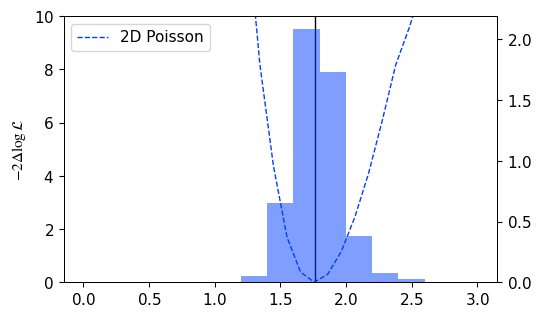

In [17]:
fig = FigureHandler("testing")
ax = fig.axes
testplotter.plot_asimov_scan_in_subplot(
    "2D_Poisson", "astro_norm", ax, label="2D Poisson", plot_inject=True
)

ax2 = ax.twinx()
testplotter.plot_pseudoexp_in_subplot("2D_Poisson", "astro_norm", ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
plt.show()

<Figure size 640x480 with 0 Axes>

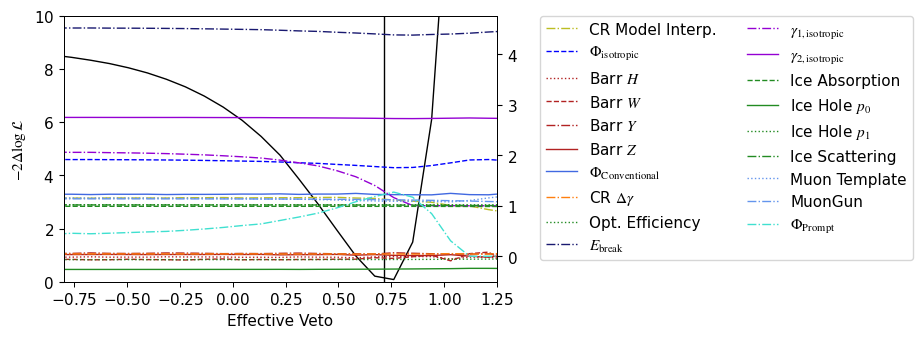

In [18]:
param = "effective_veto"
fig = FigureHandler("effveto_scan")
ax = fig.axes
testplotter.plot_asimov_scan_in_subplot(
    "2D_Poisson",
    param,
    ax,
    color="black",
    linestyle="-",
    label=None,
    plot_inject=True
)
ax2 = ax.twinx()
testplotter.plot_additional_pars_in_subplot("2D_Poisson", param, ax2)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# make a two-column legend to the right side of the plot
ax.legend(
    lines + lines2,
    labels + labels2,
    bbox_to_anchor=(1.1, 1),
    loc='upper left',
    borderaxespad=0.,
    ncol=2
)
ax.set_xlabel(parameter_plot_config[param]["label"])
ax.set_xlim(parameter_plot_config[param]["xlims"])
plt.show()